In [1]:
import numpy as np

In [2]:
import sys
import sklearn
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
X = 2 * np.random.rand(100,1)
y = 4+3*X + np.random.randn(100, 1)

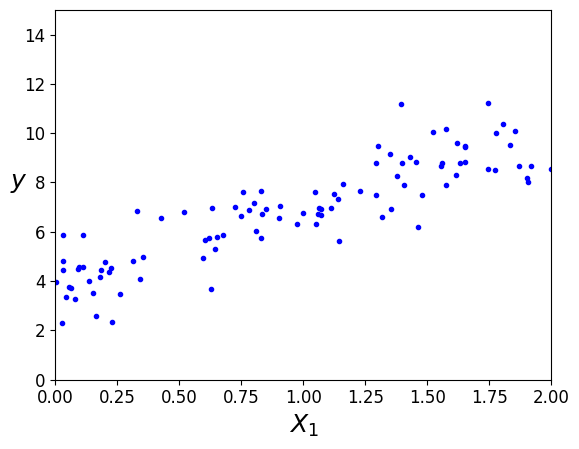

In [17]:
#Plotting the y and x

plt.plot(X,y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Normal Equation \
$\theta$ = ($X^T$$ \cdot X$)$ \cdot $$X^T$.y

In [6]:
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.9013946 ],
       [3.04617385]])

We used equation *y = 4+3x* \
our Expexted value for Weight *W* and Bias *B* was 3 and 4 repectively.  \
with our Normal Equation we got, *W* = 3.9 and *B* = 3.04 almost equal to original but noise made it imposible to recover true values.

In [18]:
#predicting values
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.9013946 ],
       [9.99374231]])

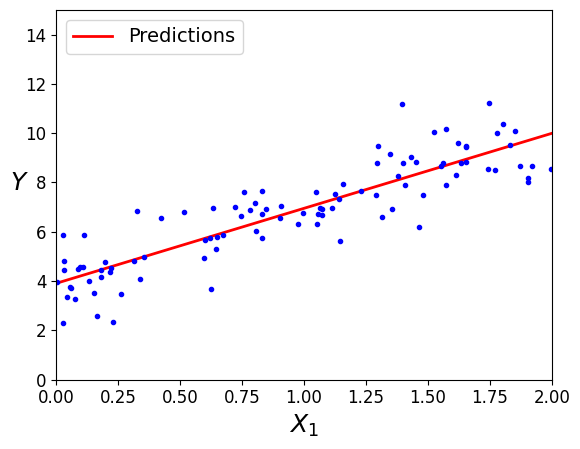

In [29]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label = "Predictions")
plt.plot(X,y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9013946]), array([[3.04617385]]))

In [33]:
lin_reg.predict(X_new)

array([[3.9013946 ],
       [9.99374231]])

In [37]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.9013946 ],
       [3.04617385]])

In [38]:
np.linalg.pinv(X_b).dot(y)

array([[3.9013946 ],
       [3.04617385]])

# Gradient Descent